In [9]:
import os

# Base path
output_base = '/Users/gemwincanete/Audio/thesis/datasets/Denoised'

# Loop through subdirectories in Denoised
for dataset_name in os.listdir(output_base):
    dataset_path = os.path.join(output_base, dataset_name)
    
    # Skip non-directories
    if not os.path.isdir(dataset_path):
        continue
    
    train_path = os.path.join(dataset_path, 'train')
    test_path = os.path.join(dataset_path, 'test')
    
    # Count files if folders exist
    train_count = len(os.listdir(train_path)) if os.path.exists(train_path) else 0
    test_count = len(os.listdir(test_path)) if os.path.exists(test_path) else 0
    
    print(f"{dataset_name}: Train = {train_count}, Test = {test_count}")


extra_systole: Train = 33, Test = 14
extra_heart_audio: Train = 14, Test = 6
murmur: Train = 89, Test = 39
normal: Train = 245, Test = 106
artifact: Train = 29, Test = 12


In [10]:
#Splitting of training and testing data

import os
import shutil

# Define paths
input_dir = '/Users/gemwincanete/Audio/thesis/datasets/Denoised'
output_dir = '/Users/gemwincanete/Audio/thesis/datasets/Denoised/train'

# Get list of class directories
class_dirs = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]

In [11]:
import os
import shutil
import random

# Base directory that contains each class (e.g., Murmur, Normal)
base_dir = '/Users/gemwincanete/Audio/thesis/datasets/Denoised'
train_ratio = 0.7  # 80% for training
seed = 42
random.seed(seed)

# Get all class folders
class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

for class_dir in class_dirs:
    class_path = os.path.join(base_dir, class_dir)
    
    # Get all WAV files inside the class folder
    wav_files = [f for f in os.listdir(class_path) if f.lower().endswith('.wav')]
    random.shuffle(wav_files)
    
    split_index = int(len(wav_files) * train_ratio)
    train_files = wav_files[:split_index]
    test_files = wav_files[split_index:]

    # Create Train and Test folders inside the class folder
    train_dir = os.path.join(class_path, 'Train')
    test_dir = os.path.join(class_path, 'Test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Move files into Train and Test folders
    for f in train_files:
        shutil.move(os.path.join(class_path, f), os.path.join(train_dir, f))
    for f in test_files:
        shutil.move(os.path.join(class_path, f), os.path.join(test_dir, f))

    print(f"✅ {class_dir}: {len(train_files)} Train, {len(test_files)} Test")

print("🎯 Done splitting all class folders!")


✅ extra_systole: 0 Train, 0 Test
✅ extra_heart_audio: 0 Train, 0 Test
✅ murmur: 0 Train, 0 Test
✅ normal: 0 Train, 0 Test
✅ artifact: 0 Train, 0 Test
🎯 Done splitting all class folders!


In [5]:
import os
import shutil
from pathlib import Path

def merge_augmented_data():
    """
    Merge augmented data with train data for each class.
    Creates train and test folders in merged_data directory.
    """
    
    # Base paths
    base_path = Path("/Users/gemwincanete/Audio2/datasets")
    merged_data_path = base_path / "merged_data"
    denoised_path = base_path / "Denoised"
    augmented_path = base_path / "Cardiac_Aware_Augmented_data"
    
    # Classes to process
    classes = ["normal", "murmur", "extra_systole", "extra_heart_audio", "artifact"]
    
    # Augmented data types
    augmented_types = ["PCGmix_cardiac_aware", "PCGmix_plus_cardiac_aware"]
    
    print("Starting data merging process...")
    
    for class_name in classes:
        print(f"\nProcessing class: {class_name}")
        
        # Create train and test directories for this class
        class_train_path = merged_data_path / class_name / "train"
        class_test_path = merged_data_path / class_name / "test"
        
        class_train_path.mkdir(parents=True, exist_ok=True)
        class_test_path.mkdir(parents=True, exist_ok=True)
        
        # Step 1: Copy train data from Denoised directory
        denoised_train_path = denoised_path / class_name / "Train"
        if denoised_train_path.exists():
            print(f"  Copying train data from {denoised_train_path}")
            for file_path in denoised_train_path.glob("*.wav"):
                if file_path.is_file():
                    dest_path = class_train_path / file_path.name
                    shutil.copy2(file_path, dest_path)
            print(f"  Copied {len(list(denoised_train_path.glob('*.wav')))} train files")
        
        # Step 2: Copy test data from Denoised directory
        denoised_test_path = denoised_path / class_name / "Test"
        if denoised_test_path.exists():
            print(f"  Copying test data from {denoised_test_path}")
            for file_path in denoised_test_path.glob("*.wav"):
                if file_path.is_file():
                    dest_path = class_test_path / file_path.name
                    shutil.copy2(file_path, dest_path)
            print(f"  Copied {len(list(denoised_test_path.glob('*.wav')))} test files")
        
        # Step 3: Copy augmented data to train folder
        for aug_type in augmented_types:
            aug_class_path = augmented_path / aug_type / class_name
            if aug_class_path.exists():
                print(f"  Copying augmented data from {aug_class_path}")
                for file_path in aug_class_path.glob("*.wav"):
                    if file_path.is_file():
                        dest_path = class_train_path / file_path.name
                        shutil.copy2(file_path, dest_path)
                print(f"  Copied {len(list(aug_class_path.glob('*.wav')))} augmented files from {aug_type}")
        
        # Count final files
        train_files = len(list(class_train_path.glob("*.wav")))
        test_files = len(list(class_test_path.glob("*.wav")))
        
        print(f"  Final counts for {class_name}:")
        print(f"    Train: {train_files} files")
        print(f"    Test: {test_files} files")
    
    print("\nData merging completed successfully!")
    
    # Print summary
    print("\n" + "="*50)
    print("FINAL SUMMARY")
    print("="*50)
    
    for class_name in classes:
        class_train_path = merged_data_path / class_name / "train"
        class_test_path = merged_data_path / class_name / "test"
        
        train_count = len(list(class_train_path.glob("*.wav"))) if class_train_path.exists() else 0
        test_count = len(list(class_test_path.glob("*.wav"))) if class_test_path.exists() else 0
        
        print(f"{class_name:20} | Train: {train_count:4d} | Test: {test_count:4d} | Total: {train_count + test_count:4d}")

if __name__ == "__main__":
    merge_augmented_data()

Starting data merging process...

Processing class: normal
  Copying train data from /Users/gemwincanete/Audio2/datasets/Denoised/normal/Train
  Copied 244 train files
  Copying test data from /Users/gemwincanete/Audio2/datasets/Denoised/normal/Test
  Copied 106 test files
  Copying augmented data from /Users/gemwincanete/Audio2/datasets/Cardiac_Aware_Augmented_data/PCGmix_cardiac_aware/normal
  Copied 423 augmented files from PCGmix_cardiac_aware
  Copying augmented data from /Users/gemwincanete/Audio2/datasets/Cardiac_Aware_Augmented_data/PCGmix_plus_cardiac_aware/normal
  Copied 423 augmented files from PCGmix_plus_cardiac_aware
  Final counts for normal:
    Train: 1090 files
    Test: 106 files

Processing class: murmur
  Copying train data from /Users/gemwincanete/Audio2/datasets/Denoised/murmur/Train
  Copied 88 train files
  Copying test data from /Users/gemwincanete/Audio2/datasets/Denoised/murmur/Test
  Copied 39 test files
  Copying augmented data from /Users/gemwincanete/Au

In [13]:
import os
import numpy as np
import librosa
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

class MFCCFeatureExtractor:
    """
    Feature extraction class using MFCC (Mel-frequency cepstral coefficients)
    """
    
    def __init__(self, 
                 sample_rate=22050,
                 n_mfcc=13,
                 n_fft=2048,
                 hop_length=512,
                 n_mels=128,
                 fmin=0,
                 fmax=None,
                 normalize=True):
        """
        Initialize MFCC feature extractor
        
        Parameters:
        -----------
        sample_rate : int
            Target sample rate for audio files
        n_mfcc : int
            Number of MFCC coefficients to extract
        n_fft : int
            FFT window size
        hop_length : int
            Number of samples between successive frames
        n_mels : int
            Number of mel bands
        fmin : float
            Minimum frequency for mel filterbank
        fmax : float
            Maximum frequency for mel filterbank (None = nyquist frequency)
        normalize : bool
            Whether to normalize the MFCC features
        """
        self.sample_rate = sample_rate
        self.n_mfcc = n_mfcc
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.n_mels = n_mels
        self.fmin = fmin
        self.fmax = fmax
        self.normalize = normalize
        
    def extract_mfcc_from_file(self, audio_path, max_length=None):
        """
        Extract MFCC features from a single audio file
        
        Parameters:
        -----------
        audio_path : str or Path
            Path to the audio file
        max_length : int, optional
            Maximum number of frames to extract (for padding/truncating)
            
        Returns:
        --------
        mfcc_features : numpy.ndarray
            MFCC features (n_mfcc x time_frames)
        """
        try:
            # Load audio file
            audio, sr = librosa.load(audio_path, sr=self.sample_rate)
            
            # Extract MFCC features
            mfcc = librosa.feature.mfcc(
                y=audio,
                sr=self.sample_rate,
                n_mfcc=self.n_mfcc,
                n_fft=self.n_fft,
                hop_length=self.hop_length,
                n_mels=self.n_mels,
                fmin=self.fmin,
                fmax=self.fmax
            )
            
            # Normalize if specified
            if self.normalize:
                mfcc = (mfcc - np.mean(mfcc)) / (np.std(mfcc) + 1e-8)
            
            # Pad or truncate to max_length if specified
            if max_length is not None:
                if mfcc.shape[1] < max_length:
                    # Pad with zeros
                    padding = np.zeros((self.n_mfcc, max_length - mfcc.shape[1]))
                    mfcc = np.hstack([mfcc, padding])
                else:
                    # Truncate
                    mfcc = mfcc[:, :max_length]
            
            return mfcc
            
        except Exception as e:
            print(f"Error processing {audio_path}: {str(e)}")
            return None
    
    def extract_mfcc_statistics(self, audio_path):
        """
        Extract statistical features from MFCC (mean, std, min, max)
        
        Parameters:
        -----------
        audio_path : str or Path
            Path to the audio file
            
        Returns:
        --------
        features : dict
            Dictionary containing statistical features
        """
        mfcc = self.extract_mfcc_from_file(audio_path)
        if mfcc is None:
            return None
        
        features = {}
        
        # Statistical features for each MFCC coefficient
        for i in range(self.n_mfcc):
            features[f'mfcc_{i}_mean'] = np.mean(mfcc[i, :])
            features[f'mfcc_{i}_std'] = np.std(mfcc[i, :])
            features[f'mfcc_{i}_min'] = np.min(mfcc[i, :])
            features[f'mfcc_{i}_max'] = np.max(mfcc[i, :])
            features[f'mfcc_{i}_median'] = np.median(mfcc[i, :])
            features[f'mfcc_{i}_skew'] = self._calculate_skewness(mfcc[i, :])
            features[f'mfcc_{i}_kurtosis'] = self._calculate_kurtosis(mfcc[i, :])
        
        # Global statistics
        features['mfcc_global_mean'] = np.mean(mfcc)
        features['mfcc_global_std'] = np.std(mfcc)
        features['mfcc_global_min'] = np.min(mfcc)
        features['mfcc_global_max'] = np.max(mfcc)
        
        return features
    
    def _calculate_skewness(self, data):
        """Calculate skewness of data"""
        mean = np.mean(data)
        std = np.std(data)
        if std == 0:
            return 0
        return np.mean(((data - mean) / std) ** 3)
    
    def _calculate_kurtosis(self, data):
        """Calculate kurtosis of data"""
        mean = np.mean(data)
        std = np.std(data)
        if std == 0:
            return 0
        return np.mean(((data - mean) / std) ** 4) - 3
    
    def extract_features_from_directory(self, data_dir, output_path=None, feature_type='statistics'):
        """
        Extract features from all audio files in a directory
        
        Parameters:
        -----------
        data_dir : str or Path
            Directory containing audio files
        output_path : str or Path, optional
            Path to save the extracted features
        feature_type : str
            Type of features to extract ('mfcc', 'statistics', or 'both')
            
        Returns:
        --------
        features_df : pandas.DataFrame
            DataFrame containing extracted features
        """
        data_dir = Path(data_dir)
        audio_files = list(data_dir.glob("*.wav"))
        
        if not audio_files:
            print(f"No audio files found in {data_dir}")
            return None
        
        print(f"Processing {len(audio_files)} audio files...")
        
        features_list = []
        
        for audio_file in tqdm(audio_files, desc="Extracting features"):
            file_features = {'filename': audio_file.name}
            
            if feature_type in ['statistics', 'both']:
                stats_features = self.extract_mfcc_statistics(audio_file)
                if stats_features:
                    file_features.update(stats_features)
            
            if feature_type in ['mfcc', 'both']:
                mfcc_features = self.extract_mfcc_from_file(audio_file)
                if mfcc_features is not None:
                    # Flatten MFCC features
                    mfcc_flat = mfcc_features.flatten()
                    for i, value in enumerate(mfcc_flat):
                        file_features[f'mfcc_flat_{i}'] = value
            
            features_list.append(file_features)
        
        features_df = pd.DataFrame(features_list)
        
        # Save features if output path is specified
        if output_path:
            output_path = Path(output_path)
            output_path.parent.mkdir(parents=True, exist_ok=True)
            
            if output_path.suffix == '.csv':
                features_df.to_csv(output_path, index=False)
            elif output_path.suffix == '.pkl':
                with open(output_path, 'wb') as f:
                    pickle.dump(features_df, f)
            
            print(f"Features saved to {output_path}")
        
        return features_df

def extract_features_for_all_classes():
    """
    Extract features for all classes in the merged dataset
    """
    base_path = Path("/Users/gemwincanete/Audio/thesis/datasets/merged_data")
    output_base_path = Path("/Users/gemwincanete/Audio/thesis/features")
    
    # Create output directory
    output_base_path.mkdir(parents=True, exist_ok=True)
    
    # Initialize feature extractor
    extractor = MFCCFeatureExtractor(
        sample_rate=22050,
        n_mfcc=13,
        n_fft=2048,
        hop_length=512,
        n_mels=128,
        normalize=True
    )
    
    classes = ["normal", "murmur", "extra_systole", "extra_heart_audio", "artifact"]
    
    all_train_features = []
    all_test_features = []
    
    for class_name in classes:
        print(f"\nProcessing class: {class_name}")
        
        # Process train data
        train_dir = base_path / class_name / "train"
        if train_dir.exists():
            print(f"  Extracting train features from {train_dir}")
            train_features = extractor.extract_features_from_directory(
                train_dir,
                output_path=output_base_path / f"{class_name}_train_features.csv",
                feature_type='statistics'
            )
            if train_features is not None:
                train_features['class'] = class_name
                train_features['split'] = 'train'
                all_train_features.append(train_features)
        
        # Process test data
        test_dir = base_path / class_name / "test"
        if test_dir.exists():
            print(f"  Extracting test features from {test_dir}")
            test_features = extractor.extract_features_from_directory(
                test_dir,
                output_path=output_base_path / f"{class_name}_test_features.csv",
                feature_type='statistics'
            )
            if test_features is not None:
                test_features['class'] = class_name
                test_features['split'] = 'test'
                all_test_features.append(test_features)
    
    # Combine all features
    if all_train_features:
        combined_train = pd.concat(all_train_features, ignore_index=True)
        combined_train.to_csv(output_base_path / "all_train_features.csv", index=False)
        print(f"\nCombined train features saved: {len(combined_train)} samples")
    
    if all_test_features:
        combined_test = pd.concat(all_test_features, ignore_index=True)
        combined_test.to_csv(output_base_path / "all_test_features.csv", index=False)
        print(f"Combined test features saved: {len(combined_test)} samples")
    
    # Print summary
    print("\n" + "="*60)
    print("FEATURE EXTRACTION SUMMARY")
    print("="*60)
    
    for class_name in classes:
        train_file = output_base_path / f"{class_name}_train_features.csv"
        test_file = output_base_path / f"{class_name}_test_features.csv"
        
        train_count = len(pd.read_csv(train_file)) if train_file.exists() else 0
        test_count = len(pd.read_csv(test_file)) if test_file.exists() else 0
        
        print(f"{class_name:20} | Train: {train_count:4d} | Test: {test_count:4d} | Total: {train_count + test_count:4d}")

if __name__ == "__main__":
    extract_features_for_all_classes()


Processing class: normal
  Extracting train features from /Users/gemwincanete/Audio/thesis/datasets/merged_data/normal/train
Processing 249 audio files...


Extracting features:  18%|█▊        | 44/249 [00:00<00:01, 152.24it/s]


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import warnings
warnings.filterwarnings('ignore')

# TensorFlow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# Custom imports
from feature_extraction import MFCCFeatureExtractor

class HeartSoundLSTMClassifier:
    """
    LSTM-based classifier for heart sound classification using MFCC features
    """
    
    def __init__(self, 
                 sample_rate=22050,
                 n_mfcc=13,
                 n_fft=2048,
                 hop_length=512,
                 max_length=196,
                 n_classes=5):
        """
        Initialize the LSTM classifier
        
        Parameters:
        -----------
        sample_rate : int
            Audio sample rate
        n_mfcc : int
            Number of MFCC coefficients
        n_fft : int
            FFT window size
        hop_length : int
            Hop length between frames
        max_length : int
            Maximum number of time frames (for padding/truncating)
        n_classes : int
            Number of classes
        """
        self.sample_rate = sample_rate
        self.n_mfcc = n_mfcc
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.max_length = max_length
        self.n_classes = n_classes
        
        # Initialize feature extractor
        self.feature_extractor = MFCCFeatureExtractor(
            sample_rate=sample_rate,
            n_mfcc=n_mfcc,
            n_fft=n_fft,
            hop_length=hop_length,
            normalize=True
        )
        
        # Initialize scaler and label encoder
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        
        # Model
        self.model = None
        
    def extract_mfcc_features(self, audio_paths, labels):
        """
        Extract MFCC features from audio files
        
        Parameters:
        -----------
        audio_paths : list
            List of audio file paths
        labels : list
            List of corresponding labels
            
        Returns:
        --------
        X : numpy.ndarray
            MFCC features (samples, timesteps, features)
        y : numpy.ndarray
            Encoded labels
        """
        print("Extracting MFCC features...")
        
        mfcc_features = []
        valid_labels = []
        skipped_files = 0
        
        for i, (audio_path, label) in enumerate(zip(audio_paths, labels)):
            if i % 100 == 0:
                print(f"Processing file {i+1}/{len(audio_paths)}")
            
            try:
                mfcc = self.feature_extractor.extract_mfcc_from_file(
                    str(audio_path),  # Ensure string path
                    max_length=self.max_length
                )
                
                if mfcc is not None and mfcc.shape[0] > 0:
                    mfcc_features.append(mfcc.T)  # Transpose to (timesteps, features)
                    valid_labels.append(label)
                else:
                    skipped_files += 1
                    print(f"Skipped invalid MFCC for: {audio_path}")
                    
            except Exception as e:
                skipped_files += 1
                print(f"Error processing {audio_path}: {str(e)}")
        
        if skipped_files > 0:
            print(f"Warning: Skipped {skipped_files} files due to processing errors")
        
        if len(mfcc_features) == 0:
            raise ValueError("No valid MFCC features extracted!")
        
        X = np.array(mfcc_features)
        y = np.array(valid_labels)
        
        print(f"Extracted features shape: {X.shape}")
        print(f"Labels shape: {y.shape}")
        
        return X, y
    
    def prepare_data_from_annotations(self, audio_base_dir, annotations_file, test_size=0.2, random_state=42):
        """
        Prepare data using the annotations mapping file
        
        Parameters:
        -----------
        audio_base_dir : str or Path
            Base directory containing audio files in subdirectories
        annotations_file : str
            Path to the annotations mapping CSV file
        test_size : float
            Proportion of data to use for testing
        random_state : int
            Random seed for reproducibility
            
        Returns:
        --------
        X_train, X_test, y_train, y_test : numpy.ndarray
            Training and testing data
        """
        # Read annotations
        annotations_df = pd.read_csv(annotations_file)
        print(f"Loaded {len(annotations_df)} annotations")
        print(f"Class distribution:\n{annotations_df['diagnosis'].value_counts()}")
        
        audio_base_dir = Path(audio_base_dir)
        all_audio_paths = []
        all_labels = []
        missing_files = []
        
        print("Locating audio files...")
        
        for _, row in annotations_df.iterrows():
            filename = row['wav']
            label = row['diagnosis']
            
            # Try to find file in different subdirectories
            found = False
            possible_dirs = ['artifact', 'normal', 'murmur', 'extra_systole', 'extra_heart_audio']
            
            for subdir in possible_dirs:
                audio_path = audio_base_dir / subdir / 'Train' / filename
                if audio_path.exists():
                    all_audio_paths.append(audio_path)
                    all_labels.append(label)
                    found = True
                    break
            
            if not found:
                missing_files.append(filename)
        
        if missing_files:
            print(f"Warning: Could not find {len(missing_files)} audio files")
            if len(missing_files) <= 10:
                print("Missing files:", missing_files)
        
        print(f"Found {len(all_audio_paths)} audio files")
        
        if len(all_audio_paths) == 0:
            raise ValueError("No audio files found! Check your paths.")
        
        # Extract features
        X, y = self.extract_mfcc_features(all_audio_paths, all_labels)
        
        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        self.n_classes = len(np.unique(y_encoded))  # Update n_classes based on actual data
        y_categorical = to_categorical(y_encoded, num_classes=self.n_classes)
        
        print(f"Final class mapping: {dict(zip(self.label_encoder.classes_, range(len(self.label_encoder.classes_))))}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_categorical, 
            test_size=test_size, 
            random_state=random_state,
            stratify=y_encoded
        )
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        
        return X_train, X_test, y_train, y_test
    
    def prepare_data(self, data_dir, test_size=0.2, random_state=42):
        """
        Prepare training and testing data (original method)
        
        Parameters:
        -----------
        data_dir : str or Path
            Directory containing class folders with train/test subfolders
        test_size : float
            Proportion of data to use for testing
        random_state : int
            Random seed for reproducibility
            
        Returns:
        --------
        X_train, X_test, y_train, y_test : numpy.ndarray
            Training and testing data
        """
        data_dir = Path(data_dir)
        classes = ["normal", "murmur", "extra_systole", "extra_heart_audio", "artifact"]
        
        all_audio_paths = []
        all_labels = []
        
        print("Collecting audio files...")
        
        for class_name in classes:
            class_dir = data_dir / class_name / "Train"
            if class_dir.exists():
                audio_files = list(class_dir.glob("*.wav"))
                all_audio_paths.extend(audio_files)
                all_labels.extend([class_name] * len(audio_files))
                print(f"  {class_name}: {len(audio_files)} files")
        
        print(f"Total files collected: {len(all_audio_paths)}")
        
        # Extract features
        X, y = self.extract_mfcc_features(all_audio_paths, all_labels)
        
        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        y_categorical = to_categorical(y_encoded, num_classes=self.n_classes)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_categorical, 
            test_size=test_size, 
            random_state=random_state,
            stratify=y_encoded
        )
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        
        return X_train, X_test, y_train, y_test
    
    def build_model(self, lstm_units=[64, 32], dropout_rate=0.3, dense_units=64):
        """
        Build the LSTM model
        
        Parameters:
        -----------
        lstm_units : list
            Number of units in each LSTM layer
        dropout_rate : float
            Dropout rate
        dense_units : int
            Number of units in dense layer
        """
        input_shape = (self.max_length, self.n_mfcc)
        
        self.model = Sequential([
            Input(shape=input_shape),
            Bidirectional(LSTM(lstm_units[0], return_sequences=True)),
            Dropout(dropout_rate),
            Bidirectional(LSTM(lstm_units[1])),
            Dropout(dropout_rate),
            Dense(dense_units, activation='relu'),
            Dropout(dropout_rate/2),  # Additional dropout before output
            Dense(self.n_classes, activation='softmax')
        ])
        
        # Compile model
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        print("Model Summary:")
        self.model.summary()
        
        return self.model
    
    def train_model(self, X_train, y_train, X_val=None, y_val=None, 
                   epochs=50, batch_size=32, validation_split=0.2):
        """
        Train the LSTM model
        
        Parameters:
        -----------
        X_train, y_train : numpy.ndarray
            Training data
        X_val, y_val : numpy.ndarray, optional
            Validation data (if None, uses validation_split)
        epochs : int
            Number of training epochs
        batch_size : int
            Batch size
        validation_split : float
            Proportion of training data to use for validation
            
        Returns:
        --------
        history : keras.callbacks.History
            Training history
        """
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=15,  # Increased patience
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=7,  # Increased patience
                min_lr=1e-7,
                verbose=1
            ),
            ModelCheckpoint(
                'best_lstm_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]
        
        # Train model
        if X_val is not None and y_val is not None:
            validation_data = (X_val, y_val)
            validation_split_param = None
        else:
            validation_data = None
            validation_split_param = validation_split
        
        history = self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            validation_split=validation_split_param,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )
        
        return history
    
    def evaluate_model(self, X_test, y_test):
        """
        Evaluate the trained model
        
        Parameters:
        -----------
        X_test, y_test : numpy.ndarray
            Testing data
            
        Returns:
        --------
        results : dict
            Evaluation results
        """
        # Evaluate model
        test_loss, test_acc = self.model.evaluate(X_test, y_test, verbose=0)
        
        # Predictions
        y_pred_probs = self.model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_test, axis=1)
        
        # Calculate metrics
        f1_macro = f1_score(y_true, y_pred, average='macro')
        f1_weighted = f1_score(y_true, y_pred, average='weighted')
        precision_macro = precision_score(y_true, y_pred, average='macro')
        recall_macro = recall_score(y_true, y_pred, average='macro')
        
        results = {
            'test_loss': test_loss,
            'test_accuracy': test_acc,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'y_true': y_true,
            'y_pred': y_pred,
            'y_pred_probs': y_pred_probs
        }
        
        return results
    
    def plot_training_history(self, history):
        """
        Plot training history
        
        Parameters:
        -----------
        history : keras.callbacks.History
            Training history
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss
        axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
        axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
        axes[0].set_title('Model Loss', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Plot accuracy
        axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
        axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
        axes[1].set_title('Model Accuracy', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_confusion_matrix(self, y_true, y_pred, class_names=None):
        """
        Plot confusion matrix
        
        Parameters:
        -----------
        y_true, y_pred : numpy.ndarray
            True and predicted labels
        class_names : list, optional
            Class names for labels
        """
        if class_names is None:
            class_names = self.label_encoder.classes_
        
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=class_names, yticklabels=class_names,
                   cbar_kws={'label': 'Count'})
        plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig('lstm_confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def print_classification_report(self, y_true, y_pred, class_names=None):
        """
        Print detailed classification report
        
        Parameters:
        -----------
        y_true, y_pred : numpy.ndarray
            True and predicted labels
        class_names : list, optional
            Class names for labels
        """
        if class_names is None:
            class_names = self.label_encoder.classes_
        
        print("\n" + "="*60)
        print("CLASSIFICATION REPORT")
        print("="*60)
        print(classification_report(y_true, y_pred, target_names=class_names))
    
    def save_model(self, model_path='lstm_heart_sound_model.h5'):
        """
        Save the trained model
        
        Parameters:
        -----------
        model_path : str
            Path to save the model
        """
        self.model.save(model_path)
        print(f"Model saved to: {model_path}")
    
    def save_preprocessors(self, scaler_path='scaler.pkl', encoder_path='label_encoder.pkl'):
        """
        Save preprocessors for later use
        
        Parameters:
        -----------
        scaler_path : str
            Path to save the scaler
        encoder_path : str
            Path to save the label encoder
        """
        with open(scaler_path, 'wb') as f:
            pickle.dump(self.scaler, f)
        
        with open(encoder_path, 'wb') as f:
            pickle.dump(self.label_encoder, f)
        
        print(f"Preprocessors saved to: {scaler_path}, {encoder_path}")

def main():
    """
    Main function to run the complete LSTM pipeline
    """
    print("="*60)
    print("HEART SOUND CLASSIFICATION WITH LSTM")
    print("="*60)
    
    # Initialize classifier
    classifier = HeartSoundLSTMClassifier(
        sample_rate=22050,
        n_mfcc=13,
        n_fft=2048,
        hop_length=512,
        max_length=196,
        n_classes=5  # Will be updated based on actual data
    )
    
    # Option 1: Use annotations mapping (recommended)
    try:
        audio_base_dir = "/Users/gemwincanete/Audio/thesis/datasets/Denoised"
        annotations_file = "Annotations_mapping.csv"
        X_train, X_test, y_train, y_test = classifier.prepare_data_from_annotations(
            audio_base_dir, annotations_file
        )
    except Exception as e:
        print(f"Error using annotations mapping: {e}")
        print("Falling back to directory-based data loading...")
        
        # Option 2: Fallback to original method
        data_dir = "/Users/gemwincanete/Audio/thesis/datasets/merged_data"
        X_train, X_test, y_train, y_test = classifier.prepare_data(data_dir)
    
    # Build model
    model = classifier.build_model(
        lstm_units=[64, 32],
        dropout_rate=0.3,
        dense_units=64
    )
    
    # Train model
    print("\n" + "="*40)
    print("TRAINING MODEL")
    print("="*40)
    history = classifier.train_model(
        X_train, y_train,
        epochs=65,
        batch_size=50,
        validation_split=0.2
    )
    
    # Evaluate model
    print("\n" + "="*40)
    print("EVALUATING MODEL")
    print("="*40)
    results = classifier.evaluate_model(X_test, y_test)
    
    # Print results
    print(f"\nTest Accuracy: {results['test_accuracy']:.4f}")
    print(f"Test Loss: {results['test_loss']:.4f}")
    print(f"F1 Score (Macro): {results['f1_macro']:.4f}")
    print(f"F1 Score (Weighted): {results['f1_weighted']:.4f}")
    print(f"Precision (Macro): {results['precision_macro']:.4f}")
    print(f"Recall (Macro): {results['recall_macro']:.4f}")
    
    # Plot results
    print("\n" + "="*40)
    print("PLOTTING RESULTS")
    print("="*40)
    
    # Training history
    classifier.plot_training_history(history)
    
    # Confusion matrix
    classifier.plot_confusion_matrix(results['y_true'], results['y_pred'])
    
    # Classification report
    classifier.print_classification_report(results['y_true'], results['y_pred'])
    
    # Save model and preprocessors
    print("\n" + "="*40)
    print("SAVING MODEL")
    print("="*40)
    classifier.save_model()
    classifier.save_preprocessors()
    
    print("\n" + "="*60)
    print("TRAINING COMPLETED SUCCESSFULLY!")
    print("="*60)

if __name__ == "__main__":
    main()

HEART SOUND CLASSIFICATION WITH LSTM
Error using annotations mapping: [Errno 2] No such file or directory: 'Annotations_mapping.csv'
Falling back to directory-based data loading...
  normal: 515 files
  murmur: 314 files
  extra_systole: 205 files
  extra_heart_audio: 85 files
  artifact: 180 files
Total files collected: 1299
Extracting MFCC features...
Processing file 1/1299
Processing file 101/1299
Processing file 201/1299
Processing file 301/1299
Processing file 401/1299


KeyboardInterrupt: 

HEART SOUND CLASSIFICATION WITH LSTM
Error using annotations mapping: [Errno 2] No such file or directory: 'Annotations_mapping.csv'
Falling back to directory-based data loading...
  normal: Limited to 350 files (from 515 available)
  murmur: 314 files (no limit applied)
  extra_systole: 205 files (no limit applied)
  extra_heart_audio: 85 files (no limit applied)
  artifact: 180 files (no limit applied)
Total files collected: 1134
Extracting MFCC features...
Processing file 1/1134
Processing file 101/1134
Processing file 201/1134
Processing file 301/1134
Processing file 401/1134
Processing file 501/1134
Processing file 601/1134
Processing file 701/1134
Processing file 801/1134
Processing file 901/1134
Processing file 1001/1134
Processing file 1101/1134
Extracted features shape: (1134, 196, 13)
Labels shape: (1134,)
Training set shape: (907, 196, 13)
Testing set shape: (227, 196, 13)
Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_15                │ (None, 196, 128)       │        39,936 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 196, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,637 (334.52 KB)

 Trainable params: 85,637 (334.52 KB)

 Non-trainable params: 0 (0.00 B)


TRAINING MODEL
Epoch 1/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3117 - loss: 1.5442
Epoch 1: val_accuracy improved from -inf to 0.30769, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.3123 - loss: 1.5430 - val_accuracy: 0.3077 - val_loss: 1.5442 - learning_rate: 0.0010
Epoch 2/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3135 - loss: 1.5069
Epoch 2: val_accuracy improved from 0.30769 to 0.31868, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3137 - loss: 1.5067 - val_accuracy: 0.3187 - val_loss: 1.5285 - learning_rate: 0.0010
Epoch 3/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3324 - loss: 1.4929
Epoch 3: val_accuracy did not improve from 0.31868
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3326 - loss: 1.4929 - val_accuracy: 0.3077 - val_loss: 1.5269 - learning_rate: 0.0010
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3376 - loss: 1.4977
Epoch 4: val_accuracy did not improve from 0.31868
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3377 - loss: 1.4976 - val_accuracy: 0.3077 - val_loss: 1.5336 - learning_rate: 0.0010
Epoch 5/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3443 - loss: 1.4761
Epoch 5: val_accuracy did not improve from 0.31868
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3443 - loss: 1.4763 - val_accuracy: 0.3187 - val_loss: 1.4933 - learning_rate: 0.0010
Epoch 6/100
45/46 ━━━━━━━━━━━

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3459 - loss: 1.4513 - val_accuracy: 0.3571 - val_loss: 1.4618 - learning_rate: 0.0010
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3082 - loss: 1.4997
Epoch 7: val_accuracy did not improve from 0.35714
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3085 - loss: 1.4997 - val_accuracy: 0.3352 - val_loss: 1.5217 - learning_rate: 0.0010
Epoch 8/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3316 - loss: 1.4739
Epoch 8: val_accuracy did not improve from 0.35714
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3320 - loss: 1.4736 - val_accuracy: 0.3297 - val_loss: 1.4744 - learning_rate: 0.0010
Epoch 9/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3250 - loss: 1.4606
Epoch 9: val_accuracy improved from 0.35714 to 0.36264, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3251 - loss: 1.4599 - val_accuracy: 0.3626 - val_loss: 1.4140 - learning_rate: 0.0010
Epoch 10/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3589 - loss: 1.3954
Epoch 10: val_accuracy improved from 0.36264 to 0.37363, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3601 - loss: 1.3945 - val_accuracy: 0.3736 - val_loss: 1.4089 - learning_rate: 0.0010
Epoch 11/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3825 - loss: 1.3887
Epoch 11: val_accuracy did not improve from 0.37363
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3823 - loss: 1.3898 - val_accuracy: 0.3626 - val_loss: 1.4689 - learning_rate: 0.0010
Epoch 12/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3423 - loss: 1.4680
Epoch 12: val_accuracy improved from 0.37363 to 0.39011, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3432 - loss: 1.4663 - val_accuracy: 0.3901 - val_loss: 1.4301 - learning_rate: 0.0010
Epoch 13/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3734 - loss: 1.3696
Epoch 13: val_accuracy did not improve from 0.39011
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3736 - loss: 1.3688 - val_accuracy: 0.3132 - val_loss: 1.4275 - learning_rate: 0.0010
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4212 - loss: 1.2733
Epoch 14: val_accuracy improved from 0.39011 to 0.40659, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4206 - loss: 1.2739 - val_accuracy: 0.4066 - val_loss: 1.3125 - learning_rate: 0.0010
Epoch 15/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4365 - loss: 1.2393
Epoch 15: val_accuracy did not improve from 0.40659
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4367 - loss: 1.2395 - val_accuracy: 0.3846 - val_loss: 1.2774 - learning_rate: 0.0010
Epoch 16/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4443 - loss: 1.2132
Epoch 16: val_accuracy improved from 0.40659 to 0.42308, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4451 - loss: 1.2119 - val_accuracy: 0.4231 - val_loss: 1.2888 - learning_rate: 0.0010
Epoch 17/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4516 - loss: 1.1812
Epoch 17: val_accuracy improved from 0.42308 to 0.46703, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4522 - loss: 1.1805 - val_accuracy: 0.4670 - val_loss: 1.1815 - learning_rate: 0.0010
Epoch 18/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4537 - loss: 1.1822
Epoch 18: val_accuracy did not improve from 0.46703
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4535 - loss: 1.1812 - val_accuracy: 0.3516 - val_loss: 1.3093 - learning_rate: 0.0010
Epoch 19/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4924 - loss: 1.1296
Epoch 19: val_accuracy did not improve from 0.46703
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4921 - loss: 1.1291 - val_accuracy: 0.4670 - val_loss: 1.1464 - learning_rate: 0.0010
Epoch 20/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5083 - loss: 1.0527
Epoch 20: val_accuracy improved from 0.46703 to 0.52198, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5081 - loss: 1.0531 - val_accuracy: 0.5220 - val_loss: 1.0894 - learning_rate: 0.0010
Epoch 21/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5176 - loss: 1.0611
Epoch 21: val_accuracy did not improve from 0.52198
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5175 - loss: 1.0615 - val_accuracy: 0.4725 - val_loss: 1.2037 - learning_rate: 0.0010
Epoch 22/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5428 - loss: 1.0673
Epoch 22: val_accuracy improved from 0.52198 to 0.53846, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5442 - loss: 1.0640 - val_accuracy: 0.5385 - val_loss: 1.1250 - learning_rate: 0.0010
Epoch 23/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5428 - loss: 1.0451
Epoch 23: val_accuracy did not improve from 0.53846
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5428 - loss: 1.0445 - val_accuracy: 0.5330 - val_loss: 1.0801 - learning_rate: 0.0010
Epoch 24/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6509 - loss: 0.9060
Epoch 24: val_accuracy improved from 0.53846 to 0.58242, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6488 - loss: 0.9085 - val_accuracy: 0.5824 - val_loss: 0.9760 - learning_rate: 0.0010
Epoch 25/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5784 - loss: 0.9260
Epoch 25: val_accuracy did not improve from 0.58242
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5784 - loss: 0.9267 - val_accuracy: 0.5824 - val_loss: 0.9579 - learning_rate: 0.0010
Epoch 26/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5938 - loss: 0.9136
Epoch 26: val_accuracy did not improve from 0.58242
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5933 - loss: 0.9145 - val_accuracy: 0.5330 - val_loss: 1.0624 - learning_rate: 0.0010
Epoch 27/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5950 - loss: 0.9664
Epoch 27: val_accuracy did not improve from 0.58242
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5950 - loss: 0.9662 - val_accuracy: 0.4780 - val_loss: 1.1278 - learning_rate: 0.0010
Epoch 28/100
46/46 ━━━━

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5830 - loss: 0.9267 - val_accuracy: 0.6044 - val_loss: 0.9062 - learning_rate: 0.0010
Epoch 29/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6455 - loss: 0.8533
Epoch 29: val_accuracy improved from 0.60440 to 0.60989, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6451 - loss: 0.8539 - val_accuracy: 0.6099 - val_loss: 0.9361 - learning_rate: 0.0010
Epoch 30/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6675 - loss: 0.7626
Epoch 30: val_accuracy did not improve from 0.60989
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6659 - loss: 0.7658 - val_accuracy: 0.5385 - val_loss: 0.9972 - learning_rate: 0.0010
Epoch 31/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6392 - loss: 0.8190
Epoch 31: val_accuracy did not improve from 0.60989
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6398 - loss: 0.8192 - val_accuracy: 0.5659 - val_loss: 1.0141 - learning_rate: 0.0010
Epoch 32/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6674 - loss: 0.7793
Epoch 32: val_accuracy improved from 0.60989 to 0.63736, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6666 - loss: 0.7797 - val_accuracy: 0.6374 - val_loss: 0.9210 - learning_rate: 0.0010
Epoch 33/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6534 - loss: 0.7746
Epoch 33: val_accuracy did not improve from 0.63736
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6533 - loss: 0.7761 - val_accuracy: 0.6154 - val_loss: 0.9126 - learning_rate: 0.0010
Epoch 34/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6488 - loss: 0.8035
Epoch 34: val_accuracy did not improve from 0.63736
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6485 - loss: 0.8040 - val_accuracy: 0.6044 - val_loss: 0.9357 - learning_rate: 0.0010
Epoch 35/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6206 - loss: 0.8593
Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 35: val_accuracy did not improve from 0.63736
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6206 - loss: 0.8595 - val_accur

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6895 - loss: 0.6908 - val_accuracy: 0.6538 - val_loss: 0.8349 - learning_rate: 5.0000e-04
Epoch 45/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7354 - loss: 0.6362
Epoch 45: val_accuracy did not improve from 0.65385
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7355 - loss: 0.6365 - val_accuracy: 0.6099 - val_loss: 0.8305 - learning_rate: 5.0000e-04
Epoch 46/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7408 - loss: 0.5648
Epoch 46: val_accuracy did not improve from 0.65385
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7402 - loss: 0.5661 - val_accuracy: 0.6484 - val_loss: 0.8647 - learning_rate: 5.0000e-04
Epoch 47/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7305 - loss: 0.6249
Epoch 47: val_accuracy did not improve from 0.65385
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7306 - loss: 0.6248 - val_accuracy: 0.6429 - val_loss: 0.8499 - learning_rate: 5.0000e-04
Epoch 4

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7283 - loss: 0.5779 - val_accuracy: 0.6593 - val_loss: 0.8202 - learning_rate: 5.0000e-04
Epoch 55/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7589 - loss: 0.5564
Epoch 55: val_accuracy did not improve from 0.65934
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7591 - loss: 0.5560 - val_accuracy: 0.6374 - val_loss: 0.7716 - learning_rate: 5.0000e-04
Epoch 56/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7572 - loss: 0.5287
Epoch 56: val_accuracy did not improve from 0.65934
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7584 - loss: 0.5275 - val_accuracy: 0.6264 - val_loss: 0.8160 - learning_rate: 5.0000e-04
Epoch 57/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7649 - loss: 0.5074
Epoch 57: val_accuracy did not improve from 0.65934
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7652 - loss: 0.5074 - val_accuracy: 0.6154 - val_loss: 0.8369 - learning_rate: 5.0000e-04
Epoch 5

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8226 - loss: 0.4378 - val_accuracy: 0.6703 - val_loss: 0.7708 - learning_rate: 5.0000e-04
Epoch 68/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8117 - loss: 0.4306
Epoch 68: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 68: val_accuracy did not improve from 0.67033
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8111 - loss: 0.4314 - val_accuracy: 0.6429 - val_loss: 0.7889 - learning_rate: 5.0000e-04
Epoch 69/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8088 - loss: 0.4040
Epoch 69: val_accuracy did not improve from 0.67033
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8094 - loss: 0.4039 - val_accuracy: 0.6484 - val_loss: 0.7542 - learning_rate: 2.5000e-04
Epoch 70/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8472 - loss: 0.3816
Epoch 70: val_accuracy improved from 0.67033 to 0.67582, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8471 - loss: 0.3813 - val_accuracy: 0.6758 - val_loss: 0.7514 - learning_rate: 2.5000e-04
Epoch 71/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8534 - loss: 0.3550
Epoch 71: val_accuracy did not improve from 0.67582
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8532 - loss: 0.3554 - val_accuracy: 0.6319 - val_loss: 0.7926 - learning_rate: 2.5000e-04
Epoch 72/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8744 - loss: 0.3510
Epoch 72: val_accuracy improved from 0.67582 to 0.68132, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8740 - loss: 0.3514 - val_accuracy: 0.6813 - val_loss: 0.7693 - learning_rate: 2.5000e-04
Epoch 73/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8335 - loss: 0.3585
Epoch 73: val_accuracy did not improve from 0.68132
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8333 - loss: 0.3588 - val_accuracy: 0.6703 - val_loss: 0.7761 - learning_rate: 2.5000e-04
Epoch 74/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8252 - loss: 0.3858
Epoch 74: val_accuracy did not improve from 0.68132
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8254 - loss: 0.3853 - val_accuracy: 0.6758 - val_loss: 0.7683 - learning_rate: 2.5000e-04
Epoch 75/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8715 - loss: 0.3276
Epoch 75: val_accuracy improved from 0.68132 to 0.70330, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8715 - loss: 0.3278 - val_accuracy: 0.7033 - val_loss: 0.7958 - learning_rate: 2.5000e-04
Epoch 76/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8411 - loss: 0.3738
Epoch 76: val_accuracy improved from 0.70330 to 0.71978, saving model to best_lstm_model.h5


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8411 - loss: 0.3739 - val_accuracy: 0.7198 - val_loss: 0.7722 - learning_rate: 2.5000e-04
Epoch 77/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8670 - loss: 0.3624
Epoch 77: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 77: val_accuracy did not improve from 0.71978
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8671 - loss: 0.3622 - val_accuracy: 0.6923 - val_loss: 0.7987 - learning_rate: 2.5000e-04
Epoch 78/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8639 - loss: 0.3193
Epoch 78: val_accuracy did not improve from 0.71978
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8639 - loss: 0.3194 - val_accuracy: 0.7033 - val_loss: 0.7839 - learning_rate: 1.2500e-04
Epoch 79/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9020 - loss: 0.2965
Epoch 79: val_accuracy did not improve from 0.71978
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9014 - loss: 0.2969

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8914 - loss: 0.2588 - val_accuracy: 0.7253 - val_loss: 0.7537 - learning_rate: 1.2500e-04
Epoch 94/100
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8642 - loss: 0.3003
Epoch 94: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 94: val_accuracy did not improve from 0.72527
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8653 - loss: 0.2993 - val_accuracy: 0.7033 - val_loss: 0.7909 - learning_rate: 1.2500e-04
Epoch 95/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8878 - loss: 0.2878
Epoch 95: val_accuracy did not improve from 0.72527
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8878 - loss: 0.2879 - val_accuracy: 0.7143 - val_loss: 0.7852 - learning_rate: 6.2500e-05
Epoch 96/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9001 - loss: 0.2727
Epoch 96: val_accuracy did not improve from 0.72527
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9000 - loss: 0.2726 

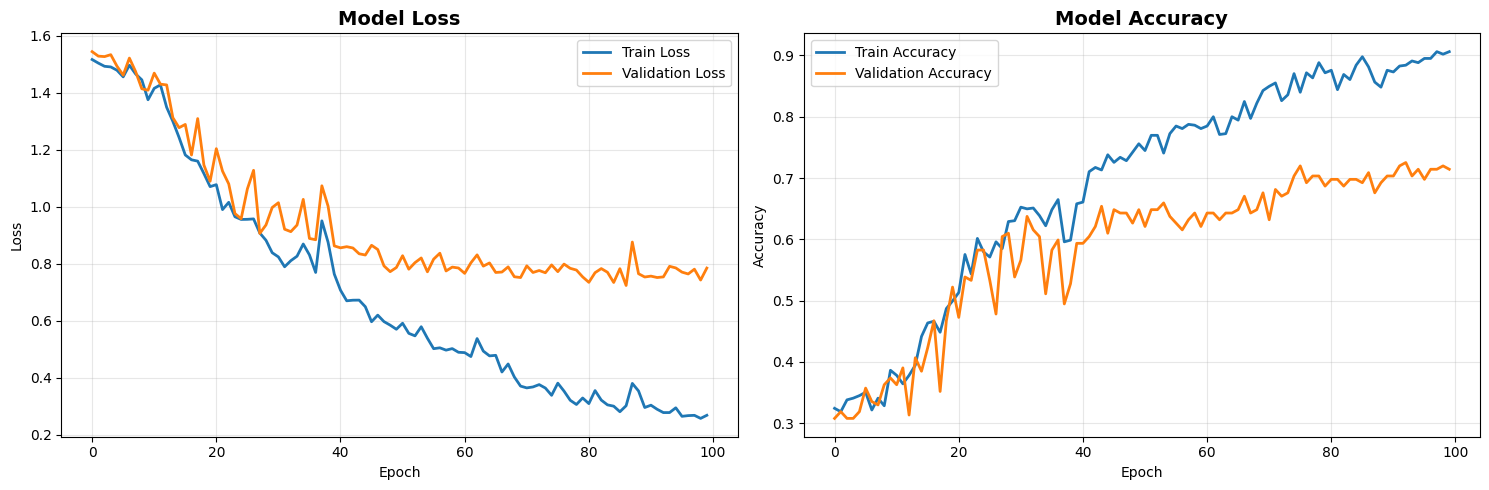

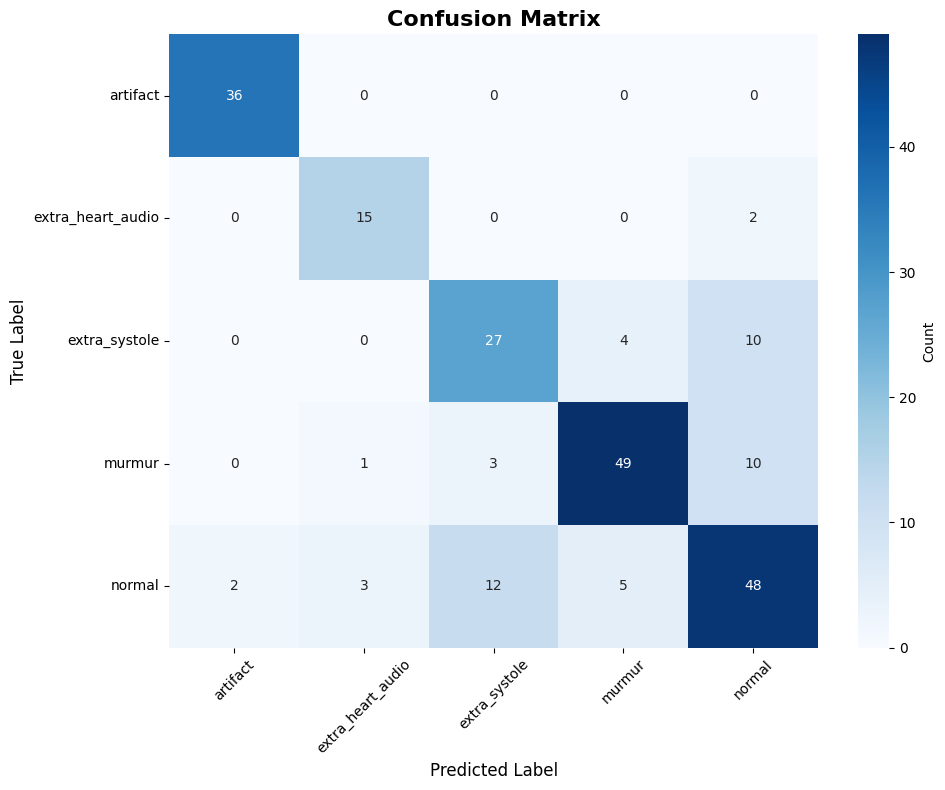


CLASSIFICATION REPORT
                   precision    recall  f1-score   support

         artifact       0.95      1.00      0.97        36
extra_heart_audio       0.79      0.88      0.83        17
    extra_systole       0.64      0.66      0.65        41
           murmur       0.84      0.78      0.81        63
           normal       0.69      0.69      0.69        70

         accuracy                           0.77       227
        macro avg       0.78      0.80      0.79       227
     weighted avg       0.77      0.77      0.77       227


SAVING MODEL
Model saved to: lstm_heart_sound_model.h5
Preprocessors saved to: scaler.pkl, label_encoder.pkl

TRAINING COMPLETED SUCCESSFULLY!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import warnings
warnings.filterwarnings('ignore')

# TensorFlow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# Custom imports
from feature_extraction import MFCCFeatureExtractor

class HeartSoundLSTMClassifier:
    """
    LSTM-based classifier for heart sound classification using MFCC features
    """
    
    def __init__(self, 
                 sample_rate=22050,
                 n_mfcc=13,
                 n_fft=2048,
                 hop_length=512,
                 max_length=196,
                 n_classes=5):
        """
        Initialize the LSTM classifier
        
        Parameters:
        -----------
        sample_rate : int
            Audio sample rate
        n_mfcc : int
            Number of MFCC coefficients
        n_fft : int
            FFT window size
        hop_length : int
            Hop length between frames
        max_length : int
            Maximum number of time frames (for padding/truncating)
        n_classes : int
            Number of classes
        """
        self.sample_rate = sample_rate
        self.n_mfcc = n_mfcc
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.max_length = max_length
        self.n_classes = n_classes
        
        # Initialize feature extractor
        self.feature_extractor = MFCCFeatureExtractor(
            sample_rate=sample_rate,
            n_mfcc=n_mfcc,
            n_fft=n_fft,
            hop_length=hop_length,
            normalize=True
        )
        
        # Initialize scaler and label encoder
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        
        # Model
        self.model = None
        
    def extract_mfcc_features(self, audio_paths, labels):
        """
        Extract MFCC features from audio files
        
        Parameters:
        -----------
        audio_paths : list
            List of audio file paths
        labels : list
            List of corresponding labels
            
        Returns:
        --------
        X : numpy.ndarray
            MFCC features (samples, timesteps, features)
        y : numpy.ndarray
            Encoded labels
        """
        print("Extracting MFCC features...")
        
        mfcc_features = []
        valid_labels = []
        skipped_files = 0
        
        for i, (audio_path, label) in enumerate(zip(audio_paths, labels)):
            if i % 100 == 0:
                print(f"Processing file {i+1}/{len(audio_paths)}")
            
            try:
                mfcc = self.feature_extractor.extract_mfcc_from_file(
                    str(audio_path),  # Ensure string path
                    max_length=self.max_length
                )
                
                if mfcc is not None and mfcc.shape[0] > 0:
                    mfcc_features.append(mfcc.T)  # Transpose to (timesteps, features)
                    valid_labels.append(label)
                else:
                    skipped_files += 1
                    print(f"Skipped invalid MFCC for: {audio_path}")
                    
            except Exception as e:
                skipped_files += 1
                print(f"Error processing {audio_path}: {str(e)}")
        
        if skipped_files > 0:
            print(f"Warning: Skipped {skipped_files} files due to processing errors")
        
        if len(mfcc_features) == 0:
            raise ValueError("No valid MFCC features extracted!")
        
        X = np.array(mfcc_features)
        y = np.array(valid_labels)
        
        print(f"Extracted features shape: {X.shape}")
        print(f"Labels shape: {y.shape}")
        
        return X, y
    
    def prepare_data_from_annotations(self, audio_base_dir, annotations_file, test_size=0.2, random_state=42, file_limits=None):
        """
        Prepare data using the annotations mapping file with optional file limits per class
        
        Parameters:
        -----------
        audio_base_dir : str or Path
            Base directory containing audio files in subdirectories
        annotations_file : str
            Path to the annotations mapping CSV file
        test_size : float
            Proportion of data to use for testing
        random_state : int
            Random seed for reproducibility
        file_limits : dict, optional
            Dictionary specifying maximum number of files per class
            e.g., {'normal': 350, 'murmur': 200}
            
        Returns:
        --------
        X_train, X_test, y_train, y_test : numpy.ndarray
            Training and testing data
        """
        # Read annotations
        annotations_df = pd.read_csv(annotations_file)
        print(f"Loaded {len(annotations_df)} annotations")
        print(f"Original class distribution:\n{annotations_df['diagnosis'].value_counts()}")
        
        # Apply file limits if specified
        if file_limits:
            print(f"\nApplying file limits: {file_limits}")
            limited_dfs = []
            
            for class_name, limit in file_limits.items():
                class_df = annotations_df[annotations_df['diagnosis'] == class_name]
                if len(class_df) > limit:
                    # Randomly sample the specified number of files
                    class_df = class_df.sample(n=limit, random_state=random_state)
                    print(f"Limited {class_name} from {len(annotations_df[annotations_df['diagnosis'] == class_name])} to {limit} files")
                else:
                    print(f"Class {class_name} has {len(class_df)} files (under limit of {limit})")
                limited_dfs.append(class_df)
            
            # Add remaining classes that don't have limits
            remaining_classes = set(annotations_df['diagnosis'].unique()) - set(file_limits.keys())
            for class_name in remaining_classes:
                class_df = annotations_df[annotations_df['diagnosis'] == class_name]
                limited_dfs.append(class_df)
                print(f"Class {class_name}: {len(class_df)} files (no limit applied)")
            
            # Combine all limited dataframes
            annotations_df = pd.concat(limited_dfs, ignore_index=True)
            print(f"\nAfter applying limits - Total files: {len(annotations_df)}")
            print(f"New class distribution:\n{annotations_df['diagnosis'].value_counts()}")
        
        audio_base_dir = Path(audio_base_dir)
        all_audio_paths = []
        all_labels = []
        missing_files = []
        
        print("\nLocating audio files...")
        
        for _, row in annotations_df.iterrows():
            filename = row['wav']
            label = row['diagnosis']
            
            # Try to find file in different subdirectories
            found = False
            possible_dirs = ['artifact', 'normal', 'murmur', 'extra_systole', 'extra_heart_audio']
            
            for subdir in possible_dirs:
                audio_path = audio_base_dir / subdir / 'Train' / filename
                if audio_path.exists():
                    all_audio_paths.append(audio_path)
                    all_labels.append(label)
                    found = True
                    break
            
            if not found:
                missing_files.append(filename)
        
        if missing_files:
            print(f"Warning: Could not find {len(missing_files)} audio files")
            if len(missing_files) <= 10:
                print("Missing files:", missing_files)
        
        print(f"Found {len(all_audio_paths)} audio files")
        
        if len(all_audio_paths) == 0:
            raise ValueError("No audio files found! Check your paths.")
        
        # Extract features
        X, y = self.extract_mfcc_features(all_audio_paths, all_labels)
        
        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        self.n_classes = len(np.unique(y_encoded))  # Update n_classes based on actual data
        y_categorical = to_categorical(y_encoded, num_classes=self.n_classes)
        
        print(f"Final class mapping: {dict(zip(self.label_encoder.classes_, range(len(self.label_encoder.classes_))))}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_categorical, 
            test_size=test_size, 
            random_state=random_state,
            stratify=y_encoded
        )
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        
        return X_train, X_test, y_train, y_test
    
    def prepare_data(self, data_dir, test_size=0.2, random_state=42, file_limits=None):
        """
        Prepare training and testing data with optional file limits per class
        
        Parameters:
        -----------
        data_dir : str or Path
            Directory containing class folders with train/test subfolders
        test_size : float
            Proportion of data to use for testing
        random_state : int
            Random seed for reproducibility
        file_limits : dict, optional
            Dictionary specifying maximum number of files per class
            e.g., {'normal': 350, 'murmur': 200}
            
        Returns:
        --------
        X_train, X_test, y_train, y_test : numpy.ndarray
            Training and testing data
        """
        data_dir = Path(data_dir)
        classes = ["normal", "murmur", "extra_systole", "extra_heart_audio", "artifact"]
        
        all_audio_paths = []
        all_labels = []
        
        print("Collecting audio files...")
        
        for class_name in classes:
            class_dir = data_dir / class_name / "Train"
            if class_dir.exists():
                audio_files = list(class_dir.glob("*.wav"))
                
                # Apply file limit if specified for this class
                if file_limits and class_name in file_limits:
                    limit = file_limits[class_name]
                    if len(audio_files) > limit:
                        # Randomly sample the specified number of files
                        np.random.seed(random_state)
                        audio_files = np.random.choice(audio_files, size=limit, replace=False).tolist()
                        print(f"  {class_name}: Limited to {len(audio_files)} files (from {len(list(class_dir.glob('*.wav')))} available)")
                    else:
                        print(f"  {class_name}: {len(audio_files)} files (under limit of {limit})")
                else:
                    print(f"  {class_name}: {len(audio_files)} files (no limit applied)")
                
                all_audio_paths.extend(audio_files)
                all_labels.extend([class_name] * len(audio_files))
        
        print(f"Total files collected: {len(all_audio_paths)}")
        
        # Extract features
        X, y = self.extract_mfcc_features(all_audio_paths, all_labels)
        
        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        y_categorical = to_categorical(y_encoded, num_classes=self.n_classes)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_categorical, 
            test_size=test_size, 
            random_state=random_state,
            stratify=y_encoded
        )
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        
        return X_train, X_test, y_train, y_test
    
    def build_model(self, lstm_units=[64, 32], dropout_rate=0.3, dense_units=64):
        """
        Build the LSTM model
        
        Parameters:
        -----------
        lstm_units : list
            Number of units in each LSTM layer
        dropout_rate : float
            Dropout rate
        dense_units : int
            Number of units in dense layer
        """
        input_shape = (self.max_length, self.n_mfcc)
        
        self.model = Sequential([
            Input(shape=input_shape),
            Bidirectional(LSTM(lstm_units[0], return_sequences=True)),
            Dropout(dropout_rate),
            Bidirectional(LSTM(lstm_units[1])),
            Dropout(dropout_rate),
            Dense(dense_units, activation='relu'),
            Dropout(dropout_rate/2),  # Additional dropout before output
            Dense(self.n_classes, activation='softmax')
        ])
        
        # Compile model
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        print("Model Summary:")
        self.model.summary()
        
        return self.model
    
    def train_model(self, X_train, y_train, X_val=None, y_val=None, 
                   epochs=50, batch_size=32, validation_split=0.2):
        """
        Train the LSTM model
        
        Parameters:
        -----------
        X_train, y_train : numpy.ndarray
            Training data
        X_val, y_val : numpy.ndarray, optional
            Validation data (if None, uses validation_split)
        epochs : int
            Number of training epochs
        batch_size : int
            Batch size
        validation_split : float
            Proportion of training data to use for validation
            
        Returns:
        --------
        history : keras.callbacks.History
            Training history
        """
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=15,  # Increased patience
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=7,  # Increased patience
                min_lr=1e-7,
                verbose=1
            ),
            ModelCheckpoint(
                'best_lstm_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]
        
        # Train model
        if X_val is not None and y_val is not None:
            validation_data = (X_val, y_val)
            validation_split_param = None
        else:
            validation_data = None
            validation_split_param = validation_split
        
        history = self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            validation_split=validation_split_param,
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )
        
        return history
    
    def evaluate_model(self, X_test, y_test):
        """
        Evaluate the trained model
        
        Parameters:
        -----------
        X_test, y_test : numpy.ndarray
            Testing data
            
        Returns:
        --------
        results : dict
            Evaluation results
        """
        # Evaluate model
        test_loss, test_acc = self.model.evaluate(X_test, y_test, verbose=0)
        
        # Predictions
        y_pred_probs = self.model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_test, axis=1)
        
        # Calculate metrics
        f1_macro = f1_score(y_true, y_pred, average='macro')
        f1_weighted = f1_score(y_true, y_pred, average='weighted')
        precision_macro = precision_score(y_true, y_pred, average='macro')
        recall_macro = recall_score(y_true, y_pred, average='macro')
        
        results = {
            'test_loss': test_loss,
            'test_accuracy': test_acc,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'y_true': y_true,
            'y_pred': y_pred,
            'y_pred_probs': y_pred_probs
        }
        
        return results
    
    def plot_training_history(self, history):
        """
        Plot training history
        
        Parameters:
        -----------
        history : keras.callbacks.History
            Training history
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss
        axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
        axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
        axes[0].set_title('Model Loss', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Plot accuracy
        axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
        axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
        axes[1].set_title('Model Accuracy', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_confusion_matrix(self, y_true, y_pred, class_names=None):
        """
        Plot confusion matrix
        
        Parameters:
        -----------
        y_true, y_pred : numpy.ndarray
            True and predicted labels
        class_names : list, optional
            Class names for labels
        """
        if class_names is None:
            class_names = self.label_encoder.classes_
        
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=class_names, yticklabels=class_names,
                   cbar_kws={'label': 'Count'})
        plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig('lstm_confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def print_classification_report(self, y_true, y_pred, class_names=None):
        """
        Print detailed classification report
        
        Parameters:
        -----------
        y_true, y_pred : numpy.ndarray
            True and predicted labels
        class_names : list, optional
            Class names for labels
        """
        if class_names is None:
            class_names = self.label_encoder.classes_
        
        print("\n" + "="*60)
        print("CLASSIFICATION REPORT")
        print("="*60)
        print(classification_report(y_true, y_pred, target_names=class_names))
    
    def save_model(self, model_path='lstm_heart_sound_model.h5'):
        """
        Save the trained model
        
        Parameters:
        -----------
        model_path : str
            Path to save the model
        """
        self.model.save(model_path)
        print(f"Model saved to: {model_path}")
    
    def save_preprocessors(self, scaler_path='scaler.pkl', encoder_path='label_encoder.pkl'):
        """
        Save preprocessors for later use
        
        Parameters:
        -----------
        scaler_path : str
            Path to save the scaler
        encoder_path : str
            Path to save the label encoder
        """
        with open(scaler_path, 'wb') as f:
            pickle.dump(self.scaler, f)
        
        with open(encoder_path, 'wb') as f:
            pickle.dump(self.label_encoder, f)
        
        print(f"Preprocessors saved to: {scaler_path}, {encoder_path}")

def main():
    """
    Main function to run the complete LSTM pipeline with file limits
    """
    print("="*60)
    print("HEART SOUND CLASSIFICATION WITH LSTM")
    print("="*60)
    
    # Initialize classifier
    classifier = HeartSoundLSTMClassifier(
        sample_rate=22050,
        n_mfcc=13,
        n_fft=2048,
        hop_length=512,
        max_length=196,
        n_classes=5  # Will be updated based on actual data
    )
    
    # Define file limits - limit normal files to 350
    file_limits = {
        'normal': 350
        # You can add limits for other classes here if needed
        # 'murmur': 200,
        # 'artifact': 100,
        # etc.
    }
    
    # Option 1: Use annotations mapping (recommended)
    try:
        audio_base_dir = "/Users/gemwincanete/Audio/thesis/datasets/Denoised"
        annotations_file = "Annotations_mapping.csv"
        X_train, X_test, y_train, y_test = classifier.prepare_data_from_annotations(
            audio_base_dir, annotations_file, file_limits=file_limits
        )
    except Exception as e:
        print(f"Error using annotations mapping: {e}")
        print("Falling back to directory-based data loading...")
        
        # Option 2: Fallback to original method
        data_dir = "/Users/gemwincanete/Audio/thesis/datasets/merged_data"
        X_train, X_test, y_train, y_test = classifier.prepare_data(
            data_dir, file_limits=file_limits
        )
    
    # Build model
    model = classifier.build_model(
        lstm_units=[64, 32],
        dropout_rate=0.3,
        dense_units=64
    )
    
    # Train model
    print("\n" + "="*40)
    print("TRAINING MODEL")
    print("="*40)
    history = classifier.train_model(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        validation_split=0.2
    )
    
    # Evaluate model
    print("\n" + "="*40)
    print("EVALUATING MODEL")
    print("="*40)
    results = classifier.evaluate_model(X_test, y_test)
    
    # Print results
    print(f"\nTest Accuracy: {results['test_accuracy']:.4f}")
    print(f"Test Loss: {results['test_loss']:.4f}")
    print(f"F1 Score (Macro): {results['f1_macro']:.4f}")
    print(f"F1 Score (Weighted): {results['f1_weighted']:.4f}")
    print(f"Precision (Macro): {results['precision_macro']:.4f}")
    print(f"Recall (Macro): {results['recall_macro']:.4f}")
    
    # Plot results
    print("\n" + "="*40)
    print("PLOTTING RESULTS")
    print("="*40)
    
    # Training history
    classifier.plot_training_history(history)
    
    # Confusion matrix
    classifier.plot_confusion_matrix(results['y_true'], results['y_pred'])
    
    # Classification report
    classifier.print_classification_report(results['y_true'], results['y_pred'])
    
    # Save model and preprocessors
    print("\n" + "="*40)
    print("SAVING MODEL")
    print("="*40)
    classifier.save_model()
    classifier.save_preprocessors()
    
    print("\n" + "="*60)
    print("TRAINING COMPLETED SUCCESSFULLY!")
    print("="*60)

if __name__ == "__main__":
    main()

In [31]:
import numpy as np
import tensorflow as tf
import librosa

# Path to your model
model_path = "/Users/gemwincanete/Audio/balanced_1dcnn_adaptive_weights_20250825_010316.h5"

# Path to your test audio
audio_path = "/Users/gemwincanete/Audio/thesis/datasets/merged_data/extra_heart_audio/train/201101070953_cardiac_pcgmix_201102070251_alpha0.46_basic_53.wav"

# Load model
model = tf.keras.models.load_model(model_path, compile=False)
print("Model loaded successfully!")
print(f"Model expects input shape: {model.input_shape}")

# Load audio
audio, sr = librosa.load(audio_path, sr=22050)
print(f"Audio shape: {audio.shape}")

# Create spectrogram to match model input (563, 181)
# Using mel-spectrogram
mel_spec = librosa.feature.melspectrogram(
    y=audio, 
    sr=sr, 
    n_mels=181,  # Height dimension
    hop_length=512,
    n_fft=2048
)

# Convert to log scale
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Transpose to get (time, frequency) = (563, 181)
mel_spec_db = mel_spec_db.T

print(f"Spectrogram shape: {mel_spec_db.shape}")

# Pad or truncate to exactly (563, 181)
target_time_steps = 563
if mel_spec_db.shape[0] > target_time_steps:
    # Truncate
    mel_spec_db = mel_spec_db[:target_time_steps, :]
elif mel_spec_db.shape[0] < target_time_steps:
    # Pad with zeros
    pad_width = target_time_steps - mel_spec_db.shape[0]
    mel_spec_db = np.pad(mel_spec_db, ((0, pad_width), (0, 0)), mode='constant')

print(f"Final spectrogram shape: {mel_spec_db.shape}")

# Add batch dimension
mel_spec_db = mel_spec_db.reshape(1, 563, 181)

# Predict
try:
    prediction = model.predict(mel_spec_db)
    predicted_class = np.argmax(prediction)
    
    # Result
    print(f"\nPredicted Class: {predicted_class}")
    print(f"Confidence: {np.max(prediction):.4f}")
    
    # Show all class probabilities (binary classification)
    normal_prob = 1 - prediction[0][0]  # Probability of being normal
    abnormal_prob = prediction[0][0]     # Probability of being abnormal
    
    print(f"Class 0 (Normal): {normal_prob:.4f} ({normal_prob*100:.2f}%)")
    print(f"Class 1 (Abnormal): {abnormal_prob:.4f} ({abnormal_prob*100:.2f}%)")
    
    # Interpretation
    if predicted_class == 0:
        print(f"\n🔍 RESULT: Audio classified as NORMAL heart sound")
        print(f"   Confidence: {np.max(prediction)*100:.2f}%")
    else:
        print(f"\n🔍 RESULT: Audio classified as ABNORMAL heart sound")
        print(f"   Confidence: {np.max(prediction)*100:.2f}%")
    
except Exception as e:
    print(f"Prediction error: {e}")

Model loaded successfully!
Model expects input shape: (None, 563, 181)
Audio shape: (264600,)
Spectrogram shape: (517, 181)
Final spectrogram shape: (563, 181)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Predicted Class: 0
Confidence: 1.0000
Class 0 (Normal): 0.0000 (0.00%)
Class 1 (Abnormal): 1.0000 (100.00%)

🔍 RESULT: Audio classified as NORMAL heart sound
   Confidence: 100.00%
